In [1]:
!pip install kaggle --upgrade

In [2]:
import os

os.environ['KAGGLE_USERNAME'] = 'sonahhyun'
os.environ['KAGGLE_KEY'] = '901ad1e73380403f630b9a8107c8df04'

!kaggle datasets download -d shivamb/netflix-shows # original netflix movies and tv shows dataset
!kaggle datasets download -d satpreetmakhija/netflix-movies-and-tv-shows-2021 # including genres dataset
!unzip '*.zip'

  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 42.4MB/s]
  0% 0.00/1.07M [00:00<?, ?B/s]
100% 1.07M/1.07M [00:00<00:00, 71.3MB/s]
Archive:  netflix-movies-and-tv-shows-2021.zip
  inflating: netflixData.csv         

Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      

2 archives were successfully processed.


In [3]:
!ls

netflixData.csv			      netflix-shows.zip   sample_data
netflix-movies-and-tv-shows-2021.zip  netflix_titles.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/content/netflix_titles.csv')
print(data.shape)
data.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

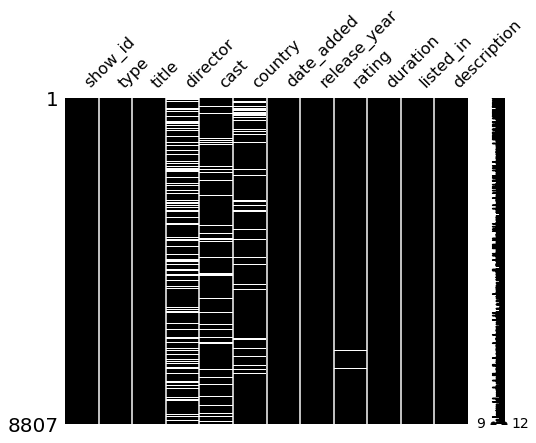

In [7]:
import missingno as msno
msno.matrix(df=data.iloc[:,:], figsize=(8,6), color=(0,0,0))

In [8]:
# missing data

for i in data.columns:
    null_rate = data[i].isna().sum() / len(data)*100
    if null_rate > 0:
        print('{} null rate: {}%'.format(i, round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


총 6개의 컬럼에서 결측값을 가진다.   

컬럼명|EDA 사용 유무|null값 비율|처리방법
----|-----------|----------|-----
director|O|29.91%|'No Data'로 대체한다(작자미상으로 간주)
cast|X|
country|O|9.37%|최빈값으로 대체한다.
date_added|O|0.1%|제거해준다.
rating|X
duration|X  

즉, 앞으로 **director, country, date_added** 컬럼들의 결측값을 적절한 방법으로 처리해보자!

In [9]:
# 활용하지 않을 컬럼들 제거!
data = data.drop(['cast', 'release_year', 'duration', 'description'], axis=1)

In [10]:
# country의 최빈값을 확인해보자
data['country'].nunique()

748

In [11]:
from collections import Counter
cnt = Counter(data['country'])
cnt.most_common(15)

[('United States', 2818),
 ('India', 972),
 (nan, 831),
 ('United Kingdom', 419),
 ('Japan', 245),
 ('South Korea', 199),
 ('Canada', 181),
 ('Spain', 145),
 ('France', 124),
 ('Mexico', 110),
 ('Egypt', 106),
 ('Turkey', 105),
 ('Nigeria', 95),
 ('Australia', 87),
 ('Taiwan', 81)]

Text(0.5, 0, 'Ratio')

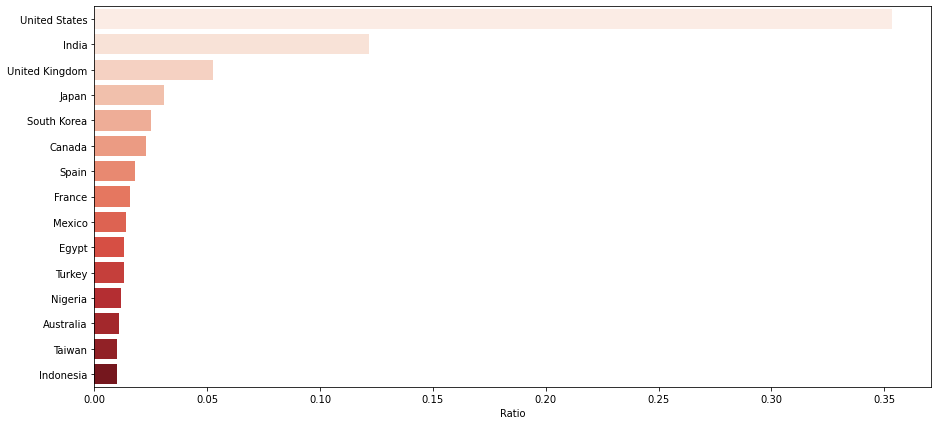

In [12]:
plt.figure(figsize=(15,7))
country = data['country'].value_counts(normalize=True)[:15]
sns.barplot(x=country, y=country.index, palette='Reds')
plt.xlabel('Ratio')

따라서, **country**의 Null값은 **'United States'**로 대체해주자!

In [13]:
data['country'] = data['country'].fillna(data['country'].mode()[0])  # 최빈값으로 결측치 대체
data['director'].replace(np.nan, 'No Data',inplace=True)  # 감독 결측치는 'No Data'로 일단은 대체!
data.head()

,show_id,type,title,director,country,date_added,rating,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",PG-13,Documentaries
1,s2,TV Show,Blood & Water,No Data,South Africa,"September 24, 2021",TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,United States,"September 24, 2021",TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,No Data,United States,"September 24, 2021",TV-MA,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,No Data,India,"September 24, 2021",TV-MA,"International TV Shows, Romantic TV Shows, TV ..."


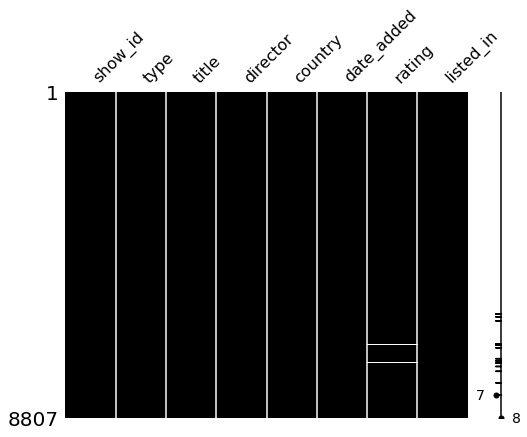

In [14]:
import missingno as msno
msno.matrix(df=data.iloc[:,:], figsize=(8,6), color=(0,0,0))

In [15]:
# missing data

for i in data.columns:
    null_rate = data[i].isna().sum() / len(data)*100
    if null_rate > 0:
        print('{} null rate: {}%'.format(i, round(null_rate,2)))

date_added null rate: 0.11%
rating null rate: 0.05%


## 이제 date_added 데이터를 계절별로 나눠보자!
* 봄(3-5월) 
* 여름(6-8월) 
* 가을(9-11월) 
* 겨울(12-2월) 


In [16]:
import datetime
data['date_added'] = pd.to_datetime(data['date_added'])
data['month'] = data['date_added'].dt.month

In [17]:
data['season'] = 0
data.loc[(data['month'] < 3) | (data['month'] == 12), 'season'] = 'Winter'
data.loc[(data['month'] >= 3) & (data['month'] < 6), 'season'] = 'Spring'
data.loc[(data['month'] >= 6) & (data['month'] < 9), 'season'] = 'Summer'
data.loc[(data['month'] >= 9) & (data['month'] < 12), 'season'] = 'Autumn'
data = data.drop(['date_added', 'month'], axis=1)

In [18]:
data.head()

,show_id,type,title,director,country,rating,listed_in,season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,PG-13,Documentaries,Autumn
1,s2,TV Show,Blood & Water,No Data,South Africa,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",Autumn
2,s3,TV Show,Ganglands,Julien Leclercq,United States,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",Autumn
3,s4,TV Show,Jailbirds New Orleans,No Data,United States,TV-MA,"Docuseries, Reality TV",Autumn
4,s5,TV Show,Kota Factory,No Data,India,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",Autumn


계절 데이터를 보니 0값을 가지는 행이 10개 존재한다.   
따라서 이 행들은 최빈값인 Summer로 대체해주자!

In [19]:
data['season'].value_counts()

Summer    2310
Autumn    2235
Spring    2138
Winter    2114
0           10
Name: season, dtype: int64

In [20]:
data[data['season']==0]

,show_id,type,title,director,country,rating,listed_in,season
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,No Data,United Kingdom,TV-MA,"British TV Shows, TV Comedies, TV Dramas",0
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,No Data,United States,TV-PG,Docuseries,0
6795,s6796,TV Show,Frasier,No Data,United States,TV-PG,"Classic & Cult TV, TV Comedies",0
6806,s6807,TV Show,Friends,No Data,United States,TV-14,"Classic & Cult TV, TV Comedies",0
6901,s6902,TV Show,Gunslinger Girl,No Data,Japan,TV-14,"Anime Series, Crime TV Shows",0
7196,s7197,TV Show,Kikoriki,No Data,United States,TV-Y,Kids' TV,0
7254,s7255,TV Show,La Familia P. Luche,No Data,United States,TV-14,"International TV Shows, Spanish-Language TV Sh...",0
7406,s7407,TV Show,Maron,No Data,United States,TV-MA,TV Comedies,0
7847,s7848,TV Show,Red vs. Blue,No Data,United States,NR,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",0
8182,s8183,TV Show,The Adventures of Figaro Pho,No Data,Australia,TV-Y7,"Kids' TV, TV Comedies",0


In [21]:
data['season'].replace(0, 'Summer',inplace=True)

In [22]:
data['season'].value_counts()

Summer    2320
Autumn    2235
Spring    2138
Winter    2114
Name: season, dtype: int64

### 이제는 country별로 어떤 season에 영상물이 얼만큼의 비율로 추가되었는지 알아보자!
*  country컬럼은 2개 이상의 국가가 존재하는 경우가 있다.
* 이 같은 경우는 처음에 위치한 국가만 고려하도록 하자!

In [23]:
data['first_country'] = data['country'].apply(lambda x: x.split(",")[0])
data.head(10)

,show_id,type,title,director,country,rating,listed_in,season,first_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,PG-13,Documentaries,Autumn,United States
1,s2,TV Show,Blood & Water,No Data,South Africa,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",Autumn,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,United States,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",Autumn,United States
3,s4,TV Show,Jailbirds New Orleans,No Data,United States,TV-MA,"Docuseries, Reality TV",Autumn,United States
4,s5,TV Show,Kota Factory,No Data,India,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",Autumn,India
5,s6,TV Show,Midnight Mass,Mike Flanagan,United States,TV-MA,"TV Dramas, TV Horror, TV Mysteries",Autumn,United States
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",United States,PG,Children & Family Movies,Autumn,United States
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",TV-MA,"Dramas, Independent Movies, International Movies",Autumn,United States
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,TV-14,"British TV Shows, Reality TV",Autumn,United Kingdom
9,s10,Movie,The Starling,Theodore Melfi,United States,PG-13,"Comedies, Dramas",Autumn,United States


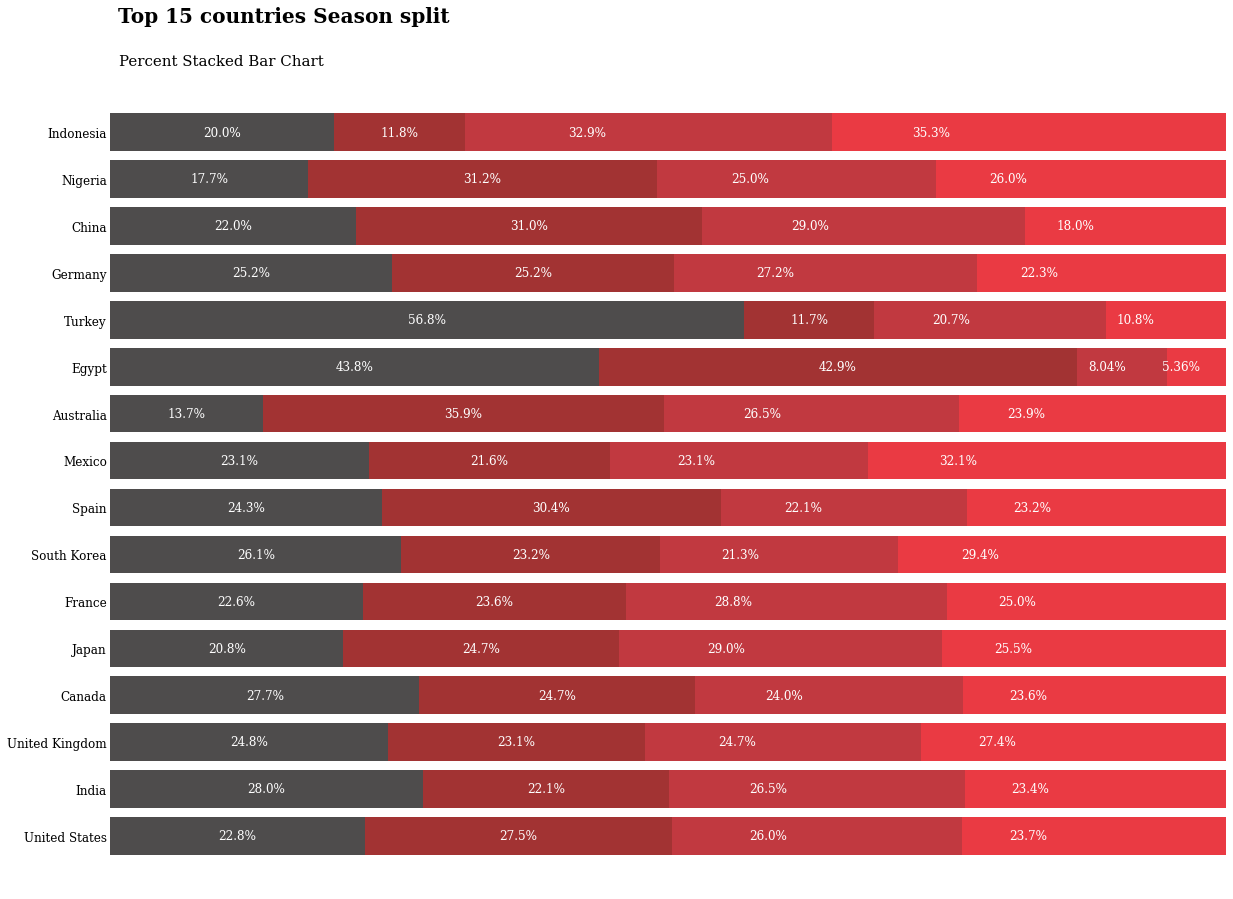

In [24]:
country_order = data['first_country'].value_counts()[:16].index
data_q2q3 = data[['season', 'first_country']].groupby('first_country')['season'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Spring','Summer','Autumn','Winter']]

###
fig, ax = plt.subplots(1,1,figsize=(20, 15),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Spring'], 
        color='#221f1f', alpha=0.8, label='Spring')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Summer'], left=data_q2q3_ratio['Spring'], 
        color='#8B0000', alpha=0.8, label='Summer')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Autumn'], left=data_q2q3_ratio['Spring']+data_q2q3_ratio['Summer'],
        color='#b20710', alpha=0.8, label='Autumn')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Winter'], left=data_q2q3_ratio['Spring']+data_q2q3_ratio['Summer']+data_q2q3_ratio['Autumn'],
        color='#e50914', alpha=0.8, label='Winter')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)


# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Spring'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Spring'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Summer'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Spring'][i]+data_q2q3_ratio['Summer'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Autumn'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Spring'][i]+data_q2q3_ratio['Summer'][i]+data_q2q3_ratio['Autumn'][i]/3, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Winter'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Spring'][i]+data_q2q3_ratio['Summer'][i]+data_q2q3_ratio['Autumn'][i]+data_q2q3_ratio['Winter'][i]/4, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 15 countries Season split', fontsize=20, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=15,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)


ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

### top15 국가별 어떤 계절에 영상물이 주로 추가되었는지 확인해보자!

차례대로 봄, 여름, 가을, 겨울에 해당하는 비율을 나타낸다.    
* Turkey와 Egypt가 눈에 띈다.
* Turkey의 경우 56.8%의 수치로 절반이상이 봄에 추가되었다.
* Egypt의 경우 봄이 43.8%, 여름이 42.9%로 봄, 여름에 대부분의 영상물이 추가되었다. 